### Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years


In [96]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [97]:
# Loading the dataset
df= pd.read_csv('50_Startups.csv')

In [98]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [100]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [101]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [102]:
#Correlation Analysis

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


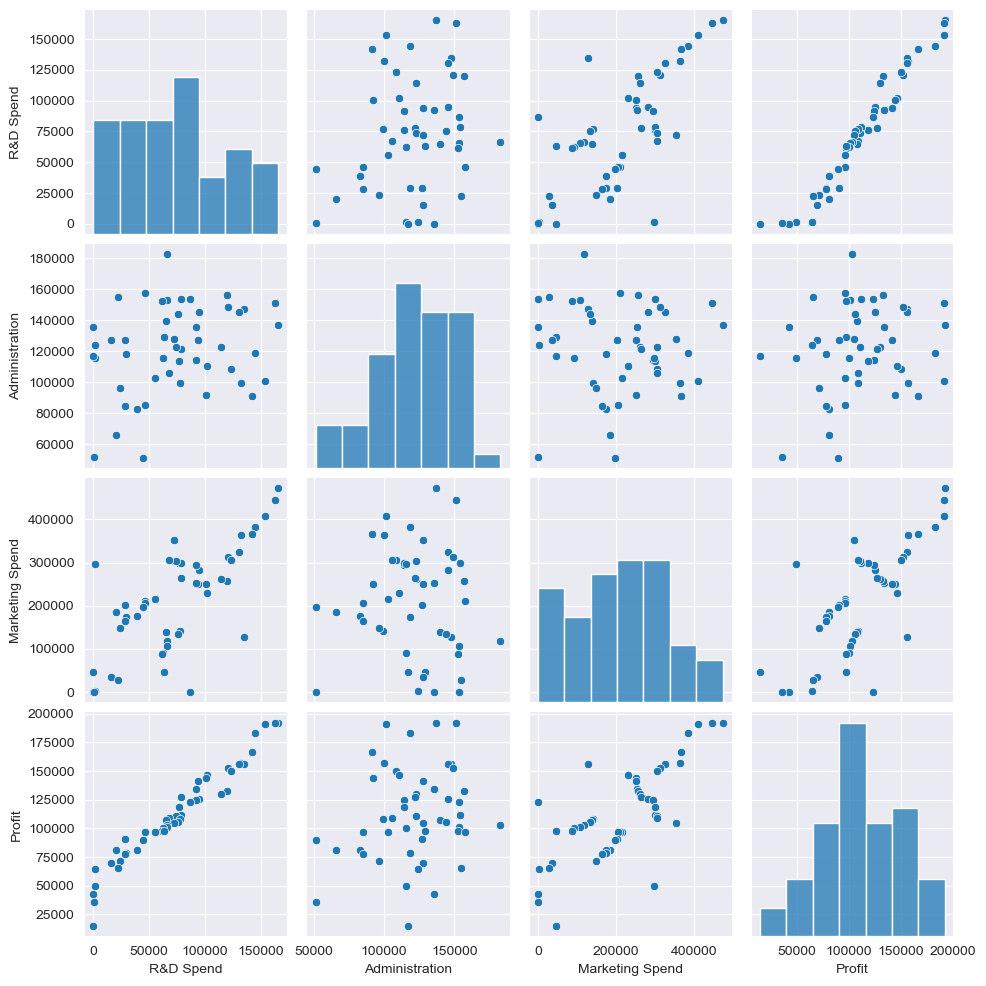

In [103]:
sns.set_style(style='darkgrid')
sns.pairplot(df)

In [104]:
#Converting Categorical data into dummy variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['State'] = le.fit_transform(df['State'])

In [105]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [106]:
df.corr()

,R&D Spend,Administration,Marketing Spend,State,Profit
R&D Spend,1.000000,0.241955,0.724248,0.104685,0.972900
Administration,0.241955,1.000000,-0.032154,0.011847,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.077670,0.747766
State,0.104685,0.011847,0.077670,1.000000,0.101796
Profit,0.972900,0.200717,0.747766,0.101796,1.000000


In [107]:
#Renaming the columns
data = df.rename(columns={'R&D Spend': 'RandD_spend', 'Marketing Spend': 'Marketing_Spend'})

In [108]:
data.head()

,RandD_spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [109]:
#Building the model
import statsmodels.formula.api as smf 
model = smf.ols('Profit~ RandD_spend+Administration+Marketing_Spend+State',data=data).fit()

In [110]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Fri, 19 Jan 2024   Prob (F-statistic):           8.51e-29
Time:                        23:00:00   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.014e+04   6804.555      7.369      0.000    3.64e+04    6.38e+04
RandD_spend         0.8058      0.046     17.609      0.000       0.714       0.898
Administration     -0.0268      0.052     -0.520      0.606      -0.131       0.077
Marketing_Spend     0.0272      0.017      1.637      0.109      -0.006       0.061
State             -22.3206   1609.829     -0.014      0.989   -3264.682    3220.041
==============================================================================
Omnibus:                       14.864   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.542
Skew:                          -0.949   Prob(JB):                     2.10e-05
Kurtosis:                       5.596   Cond. No.                     1.44e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [111]:
#Building the model by removing state
model1 = smf.ols('Profit~ RandD_spend+Administration+Marketing_Spend',data=data).fit()

In [112]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 19 Jan 2024   Prob (F-statistic):           4.53e-30
Time:                        23:00:00   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RandD_spend         0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing_Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###### Checking model individually

In [113]:
#Building the model with only RandD_spend
model_RandD=smf.ols('Profit~ RandD_spend',data=data).fit()
model_RandD.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Fri, 19 Jan 2024   Prob (F-statistic):           3.50e-32
Time:                        23:00:00   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
RandD_spend     0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [114]:
#Building the model with only Administration
model_Administration=smf.ols('Profit~ Administration',data=data).fit()
model_Administration.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Fri, 19 Jan 2024   Prob (F-statistic):              0.162
Time:                        23:00:00   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [115]:
#Building the model with only Marketing_Spend

model_Marketing_Spend=smf.ols('Profit~ Marketing_Spend',data=data).fit()
model_Marketing_Spend.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Fri, 19 Jan 2024   Prob (F-statistic):           4.38e-10
Time:                        23:00:01   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept            6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
Marketing_Spend     0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### checking VIF(Variance inflation factor) values for different models

In [116]:
rsq_Profit = smf.ols('Profit~ RandD_spend+Administration+Marketing_Spend',data=data).fit().rsquared  
vif_Profit = 1/(1-rsq_Profit) 

rsq_RandD_spend = smf.ols('RandD_spend~Profit+Administration+Marketing_Spend',data=data).fit().rsquared  
vif_RandD_spend = 1/(1-rsq_RandD_spend) 

rsq_Administration = smf.ols('Administration~Profit+RandD_spend+Marketing_Spend',data=data).fit().rsquared  
vif_Administration = 1/(1-rsq_Administration) 

rsq_Marketing_Spend = smf.ols('Marketing_Spend~Profit+RandD_spend+Administration',data=data).fit().rsquared  
vif_Marketing_Spend = 1/(1-rsq_Marketing_Spend) 

# Storing vif values in a data frame
d1 = {'Variables':['Prfit','RandD_spend','Administration','Marketing_Spend'],'VIF':[vif_Profit,vif_RandD_spend,vif_Administration,vif_Marketing_Spend]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Prfit,20.302917
1,RandD_spend,19.563001
2,Administration,1.182146
3,Marketing_Spend,2.465332


In [117]:
# comparing model prediction with the actucal prediction

In [118]:
predictions = model1.predict(data)
predictions
actual=data.Profit

pred_actual = pd.DataFrame(predictions)
pred_actual['actual']=actual

pred_actual

,0,actual
0,192521.252890,192261.83
1,189156.768232,191792.06
2,182147.279096,191050.39
3,173696.700026,182901.99
4,172139.514183,166187.94
5,163580.780571,156991.12
6,158114.096669,156122.51
7,160021.363048,155752.60
8,151741.699699,152211.77
9,154884.684110,149759.96


In [119]:
model1.resid.mean()

7.872586138546467e-11

In [120]:
model1.resid_pearson

array([-0.02809938,  0.28544153,  0.96434012,  0.99707064, -0.64464453,
       -0.71375884, -0.21571863, -0.46237091,  0.05091565, -0.5550843 ,
        1.14953951,  0.94078986,  1.34824679,  0.73863854, -1.83550495,
       -1.76749655,  1.0915467 , -0.52230311, -0.51420652,  0.77354686,
        0.19868872, -0.65058642, -0.4716826 , -0.1367612 , -0.52109528,
        0.5596217 , -0.52717275, -1.01813481,  0.17572521, -0.08560602,
        0.05255627, -0.02212834, -0.1704324 , -0.12305531,  0.83115771,
        0.64641399,  1.67043502,  0.03570086,  1.249048  , -0.29496894,
        0.37086567,  0.32454128,  0.095109  ,  1.03895062,  0.06379481,
        1.87118758, -0.72305186, -0.42577084, -1.462033  , -3.63220515])

<Axes: ylabel='Frequency'>

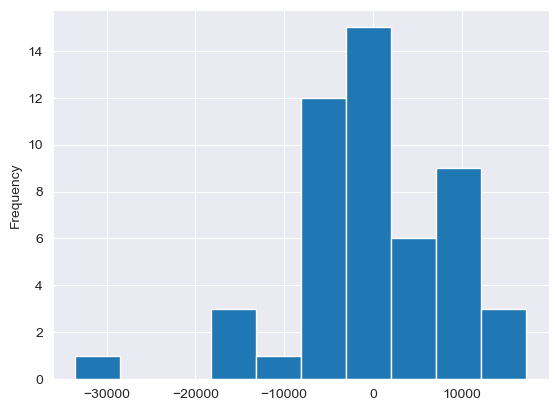

In [121]:
model1.resid.plot(kind='hist')

In [122]:
# Residual Analysis
## Test for Normality of Residuals (Q-Q Plot)

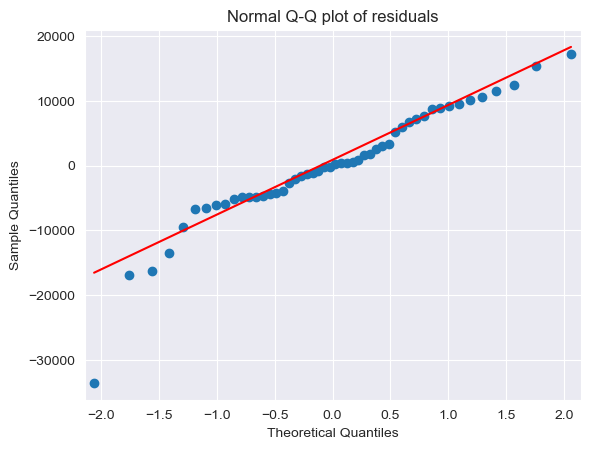

In [123]:
import statsmodels.api as sm
qqplot = sm.qqplot(model1.resid, line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [124]:
list(np.where(model1.resid<-20000))

[array([49], dtype=int64)]

#### Residual Plot for Homoscedasticity

In [126]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

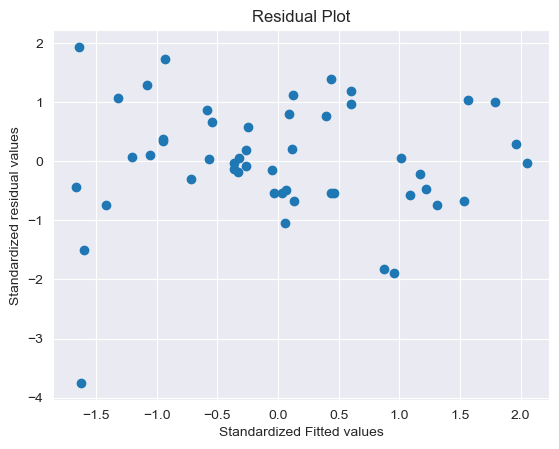

In [127]:
plt.scatter(get_standardized_values(model1.fittedvalues),
            get_standardized_values(model1.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

#### Residual Vs Regressors

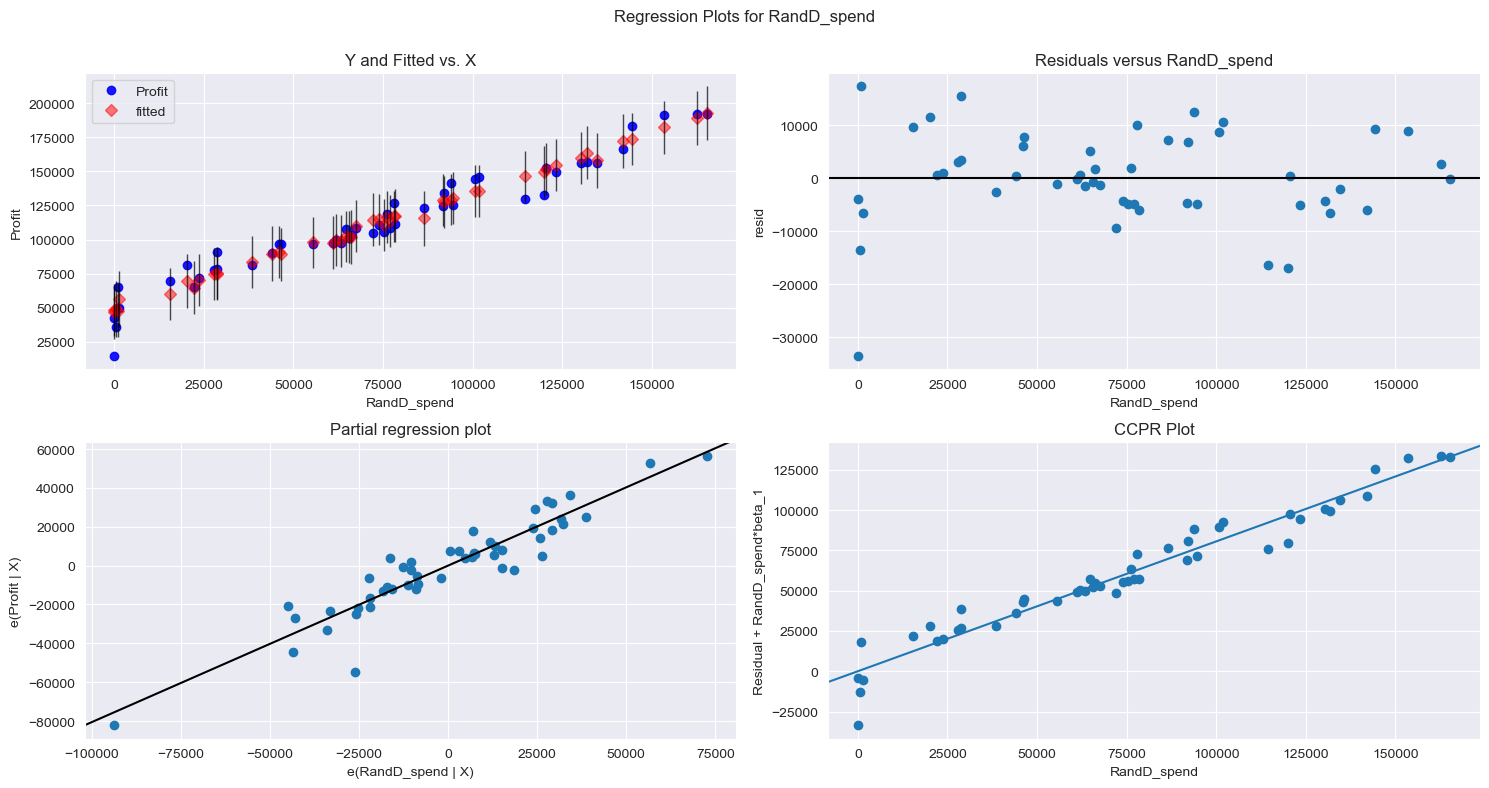

In [129]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "RandD_spend", fig=fig)
plt.show()

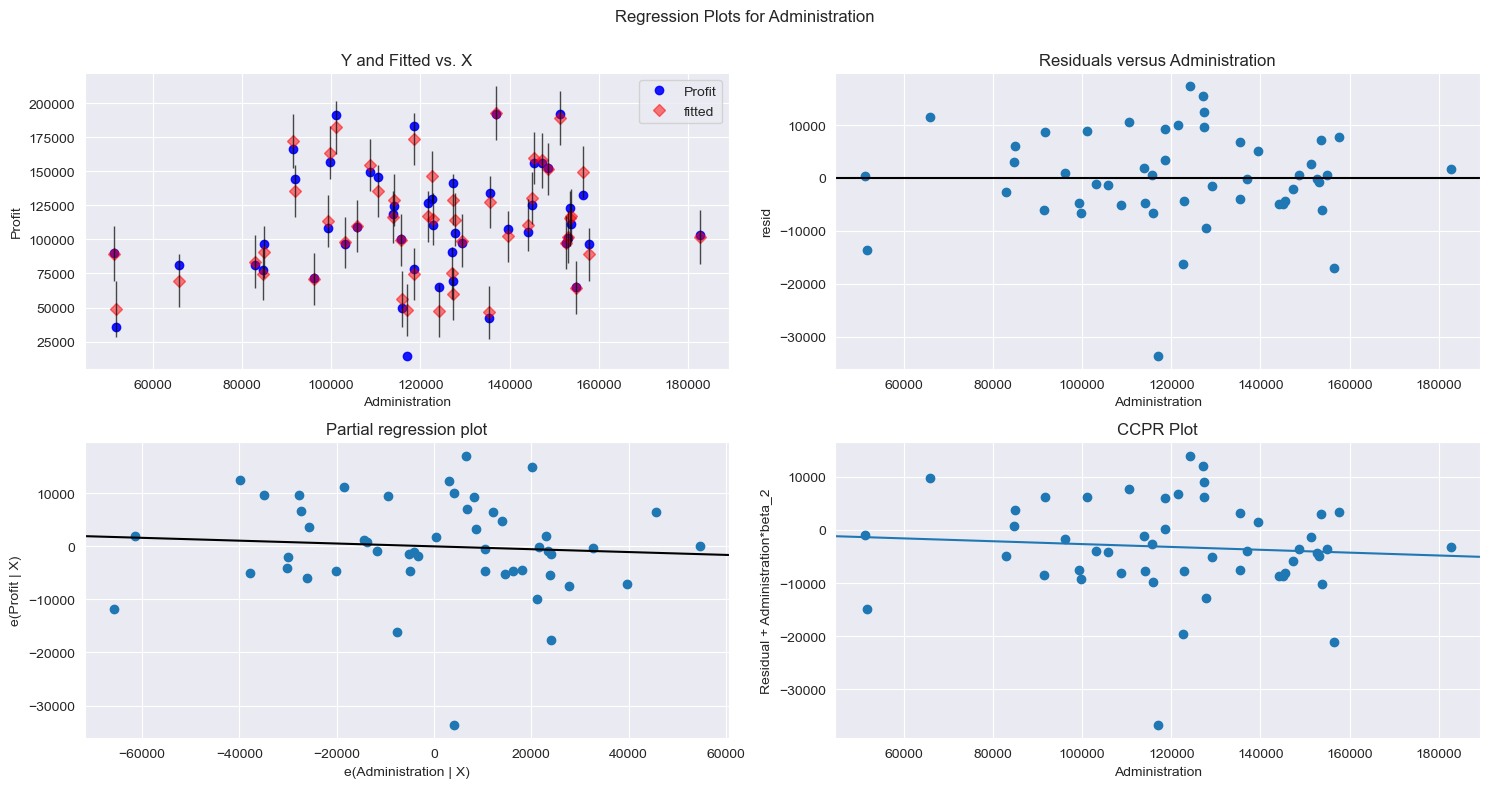

In [130]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "Administration", fig=fig)
plt.show()

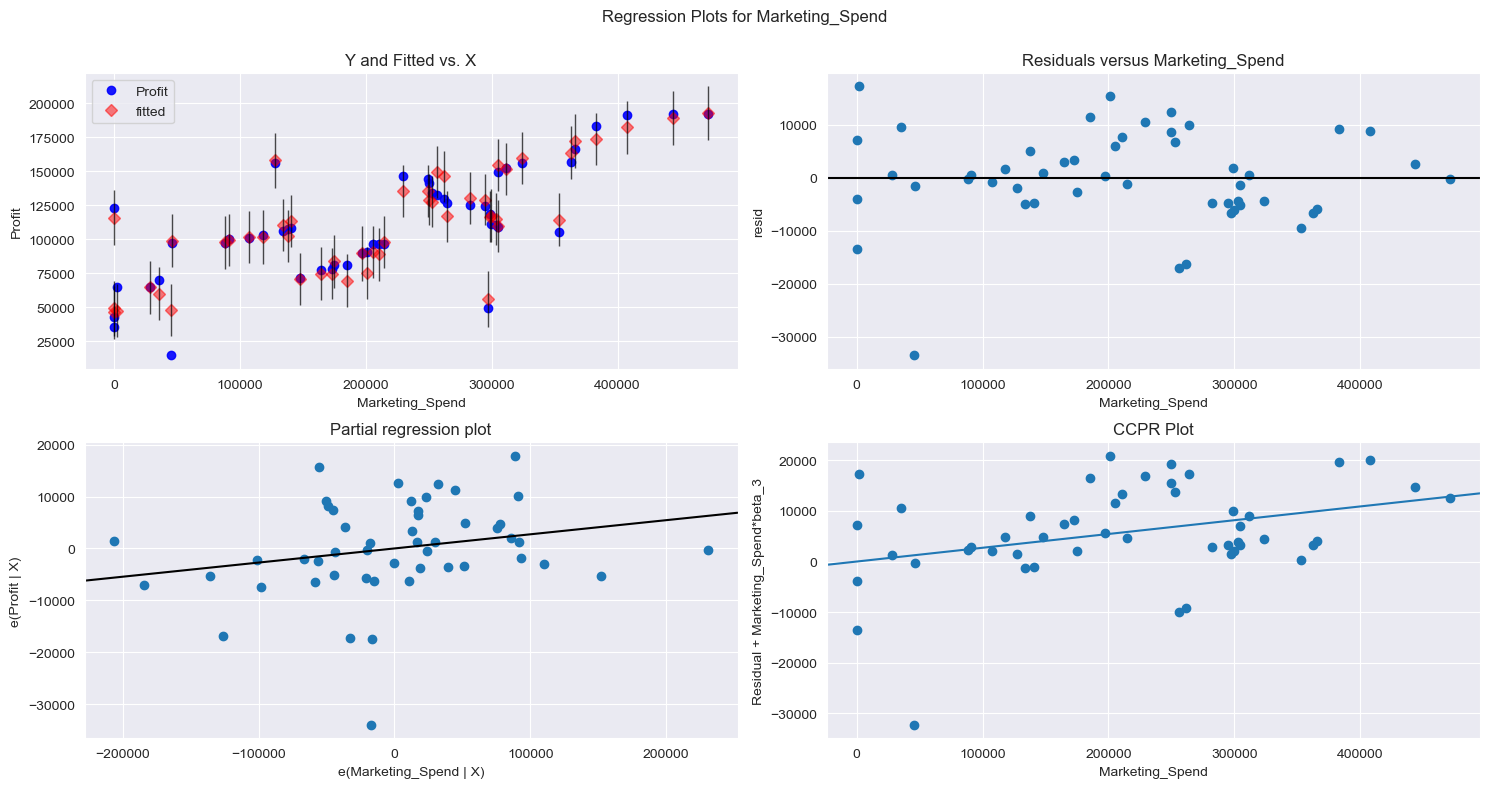

In [131]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "Marketing_Spend", fig=fig)
plt.show()

#### Model Deletion Diagnostics
#### Detecting Influencers/Outliers


In [132]:
# Cook's distance
from statsmodels.graphics.regressionplots import influence_plot
model_influence = model1.get_influence()
(c, _) = model_influence.cooks_distance

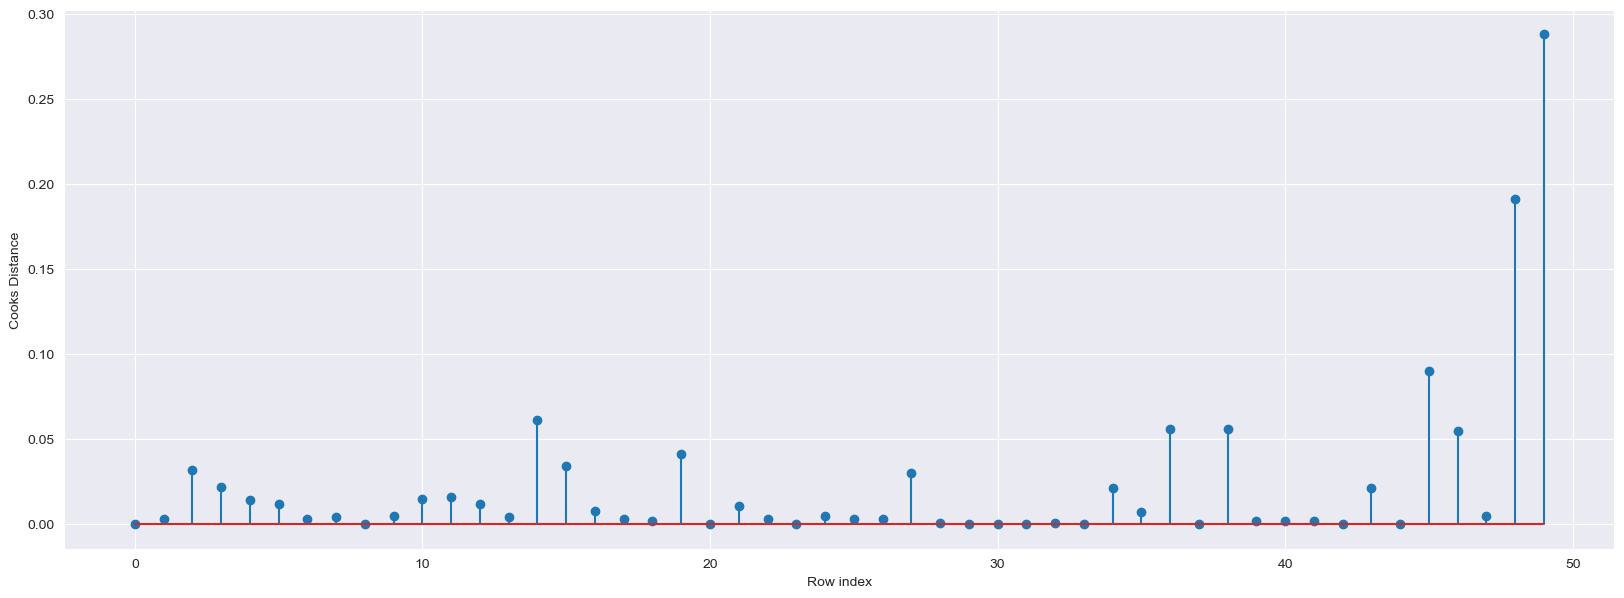

In [133]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [134]:
(np.argmax(c),np.max(c))

(49, 0.2880822927543263)

In [135]:
data.shape

(50, 5)

In [136]:
data1=data.drop(data.index[49],axis=0).reset_index()

In [137]:
data1.head()

,index,RandD_spend,Administration,Marketing_Spend,State,Profit
0,0,165349.20,136897.80,471784.10,2,192261.83
1,1,162597.70,151377.59,443898.53,0,191792.06
2,2,153441.51,101145.55,407934.54,1,191050.39
3,3,144372.41,118671.85,383199.62,2,182901.99
4,4,142107.34,91391.77,366168.42,1,166187.94


In [138]:
data1.drop(['index'],axis=1)

,RandD_spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94
5,131876.90,99814.71,362861.36,2,156991.12
6,134615.46,147198.87,127716.82,0,156122.51
7,130298.13,145530.06,323876.68,1,155752.60
8,120542.52,148718.95,311613.29,2,152211.77
9,123334.88,108679.17,304981.62,0,149759.96


In [139]:
#model
#final model
final_m = smf.ols('Profit~ RandD_spend+Administration+Marketing_Spend',data = data1).fit() 

In [140]:
final_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Fri, 19 Jan 2024   Prob (F-statistic):           8.85e-32
Time:                        23:00:12   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RandD_spend         0.7830      0.038     20.470      0.000       0.706       0.860
Administration     -0.0222      0.043     -0.518      0.607      -0.109       0.064
Marketing_Spend     0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [141]:
(final_m.rsquared,final_m.aic)

(0.9613162435129847, 1020.5652974526367)

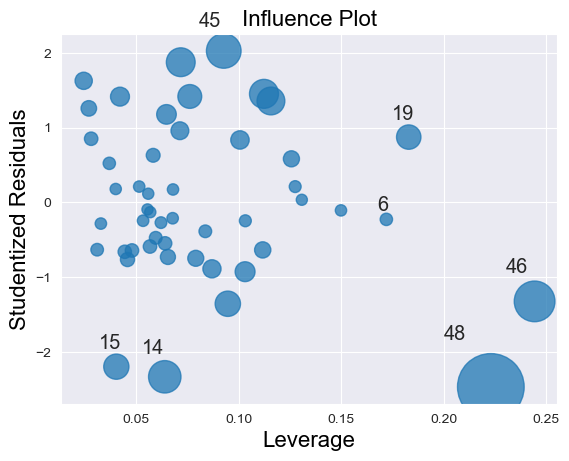

In [142]:
influence_plot(final_m)
plt.show()

In [143]:
# Cook's distance
model_influence = final_m.get_influence()
(c, _) = model_influence.cooks_distance

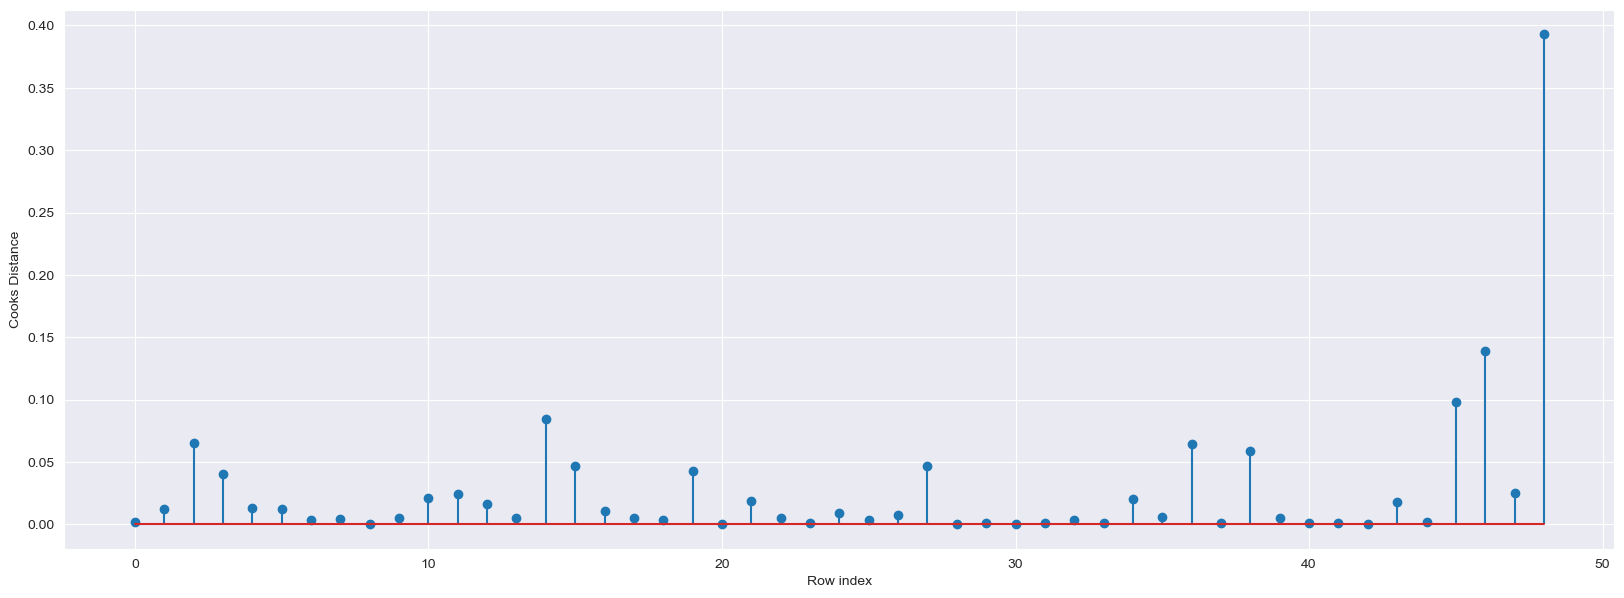

In [144]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [145]:
(np.argmax(c),np.max(c))

(48, 0.39274420556321527)

In [146]:
data2=data1.drop(data1.index[48],axis=0).reset_index()

In [147]:
data2.head()

,level_0,index,RandD_spend,Administration,Marketing_Spend,State,Profit
0,0,0,165349.20,136897.80,471784.10,2,192261.83
1,1,1,162597.70,151377.59,443898.53,0,191792.06
2,2,2,153441.51,101145.55,407934.54,1,191050.39
3,3,3,144372.41,118671.85,383199.62,2,182901.99
4,4,4,142107.34,91391.77,366168.42,1,166187.94


In [148]:
data2.drop(['index'],axis=1, inplace = True)

In [149]:
data2.drop(['level_0'],axis=1, inplace= True)

In [150]:
data2.head()

,RandD_spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [151]:
#model
#final model
final_m1 = smf.ols('Profit~ RandD_spend+Administration+Marketing_Spend',data = data2).fit() 

In [152]:
final_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     378.3
Date:                Fri, 19 Jan 2024   Prob (F-statistic):           2.03e-31
Time:                        23:00:14   Log-Likelihood:                -493.33
No. Observations:                  48   AIC:                             994.7
Df Residuals:                      44   BIC:                             1002.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         5.91e+04   5916.711      9.988      0.000    4.72e+04     7.1e+04
RandD_spend         0.7895      0.036     21.718      0.000       0.716       0.863
Administration     -0.0633      0.044     -1.442      0.156      -0.152       0.025
Marketing_Spend     0.0169      0.014      1.249      0.218      -0.010       0.044
==============================================================================
Omnibus:                        0.287   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.866   Jarque-Bera (JB):                0.475
Skew:                           0.057   Prob(JB):                        0.789
Kurtosis:                       2.526   Cond. No.                     1.58e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

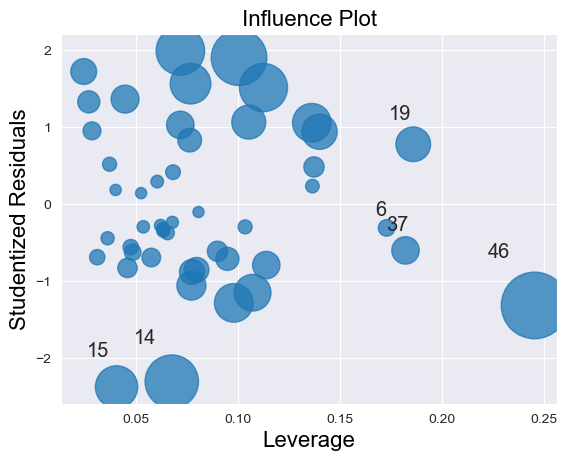

In [153]:
influence_plot(final_m1)
plt.show()

In [154]:
# Cook's distance
from statsmodels.graphics.regressionplots import influence_plot
model_influence = final_m1.get_influence()
(c, _) = model_influence.cooks_distance

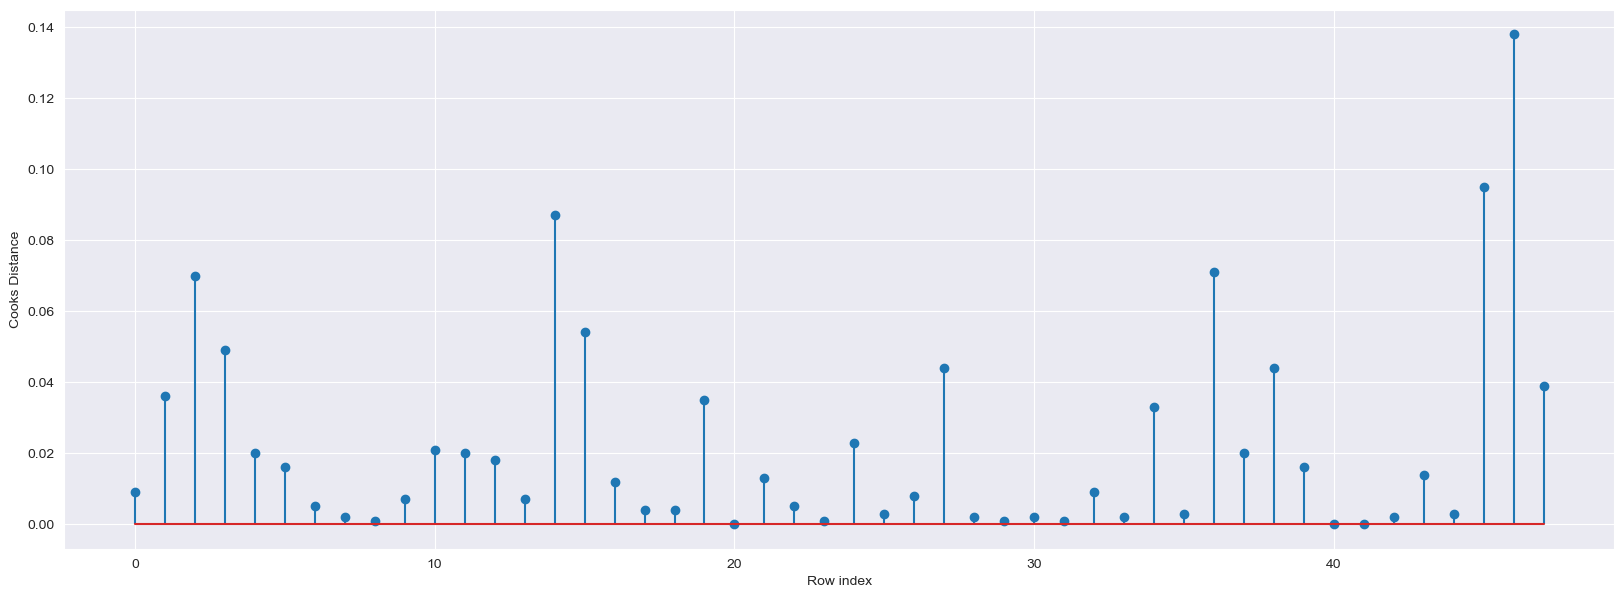

In [155]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [156]:
(np.argmax(c),np.max(c))

(46, 0.13829133994334708)

In [157]:
data3=data2.drop(data2.index[46],axis=0).reset_index()

In [158]:
data3.head()

,index,RandD_spend,Administration,Marketing_Spend,State,Profit
0,0,165349.20,136897.80,471784.10,2,192261.83
1,1,162597.70,151377.59,443898.53,0,191792.06
2,2,153441.51,101145.55,407934.54,1,191050.39
3,3,144372.41,118671.85,383199.62,2,182901.99
4,4,142107.34,91391.77,366168.42,1,166187.94


In [159]:
data3.drop(['index'],axis=1, inplace = True)

In [160]:
data3.head()

,RandD_spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


#### Final Model

In [161]:
final_m2 = smf.ols('Profit~ RandD_spend+Administration+Marketing_Spend',data = data3).fit() 

In [162]:
final_m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     357.1
Date:                Fri, 19 Jan 2024   Prob (F-statistic):           2.12e-30
Time:                        23:00:16   Log-Likelihood:                -482.62
No. Observations:                  47   AIC:                             973.2
Df Residuals:                      43   BIC:                             980.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.823e+04   5905.368      9.860      0.000    4.63e+04    7.01e+04
RandD_spend         0.7642      0.041     18.704      0.000       0.682       0.847
Administration     -0.0532      0.044     -1.202      0.236      -0.142       0.036
Marketing_Spend     0.0251      0.015      1.696      0.097      -0.005       0.055
==============================================================================
Omnibus:                        0.366   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.833   Jarque-Bera (JB):                0.530
Skew:                           0.028   Prob(JB):                        0.767
Kurtosis:                       2.483   Cond. No.                     1.57e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [163]:
# Cook's distance
from statsmodels.graphics.regressionplots import influence_plot
model_influence = final_m2.get_influence()
(c, _) = model_influence.cooks_distance

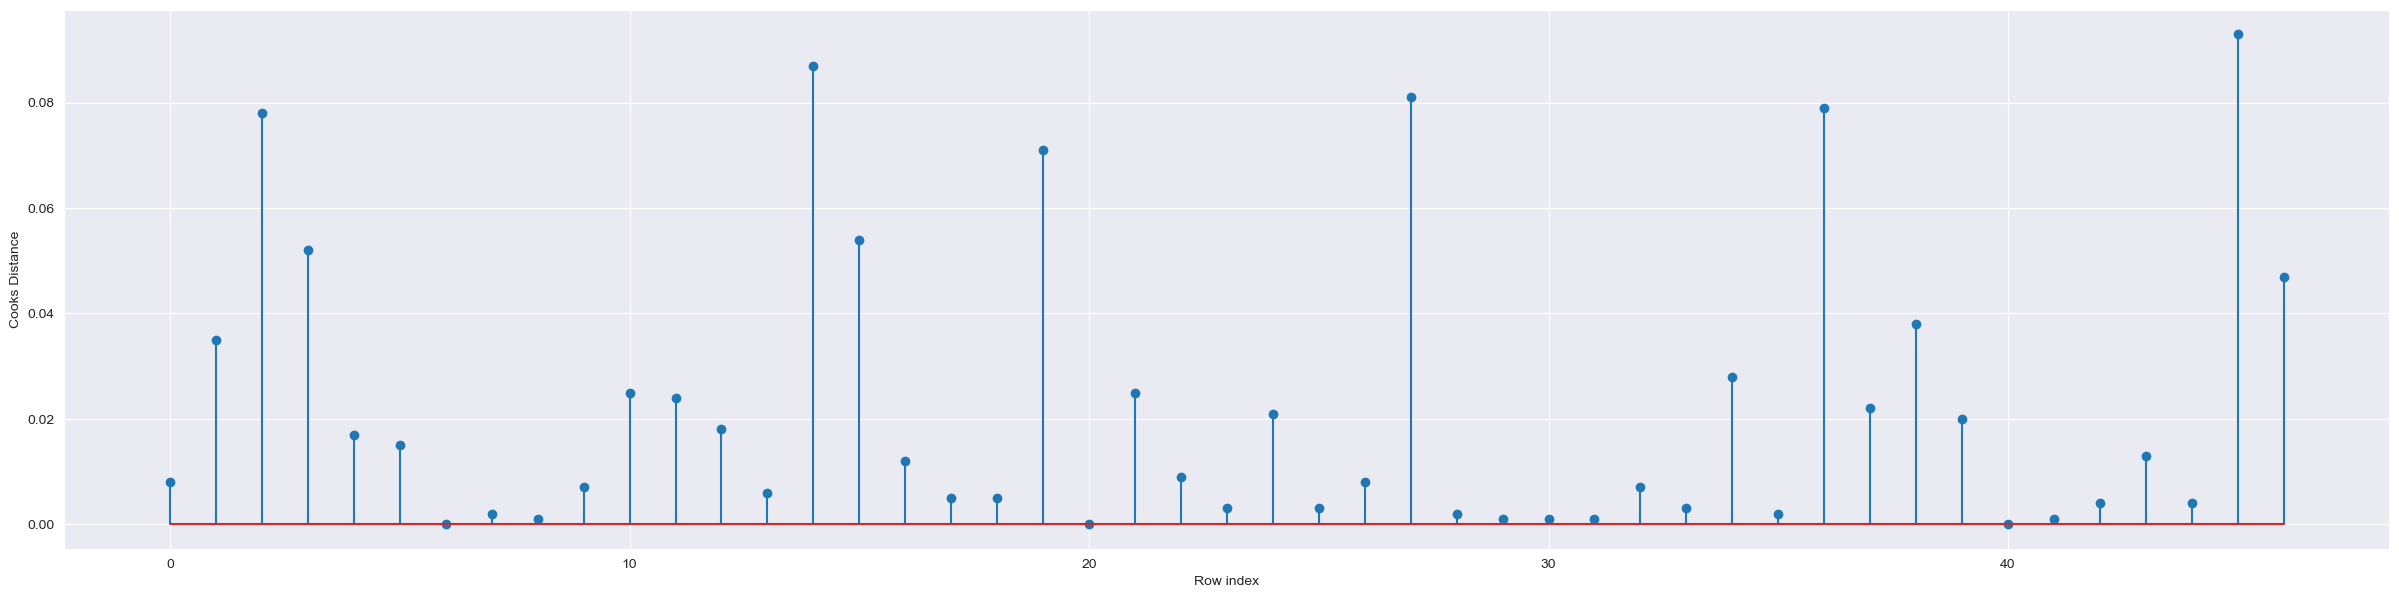

In [164]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(30, 7))
plt.stem(np.arange(len(data3)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [165]:
new_data=pd.DataFrame({'RandD_spend':352865,'Administration':764389,'Marketing_Spend':66868},index=[1])

In [166]:
final_m2.predict(new_data)

1    288909.35307
dtype: float64

In [167]:
final_m2.predict(data3)

0     189144.021141
1     185571.505316
2     180343.992254
3     171860.489927
4     171153.336127
5     162804.123770
6     156477.343357
7     158187.870039
8     150255.251593
9     154352.656745
10    135977.904080
11    136546.022058
12    129455.572750
13    127661.509729
14    147998.542616
15    145793.706944
16    118010.693099
17    129938.578129
18    129669.713023
19    116105.658621
20    117938.402714
21    117474.656407
22    115854.360943
23    111858.337361
24    115352.079636
25    103683.989930
26    111491.723852
27    115392.974943
28    101954.513645
29    102912.662101
30    101740.441122
31     99040.236547
32    100968.977775
33    100540.396562
34     90608.105042
35     94025.014882
36     78421.052027
37     94122.405580
38     74828.161109
39     87671.677996
40     78232.195211
41     79164.837264
42     74891.654066
43     64193.943484
44     67653.399768
45     52436.773768
46     51024.934949
dtype: float64

In [168]:
# comparing actual and predicted values
actual_values = data3['Profit']

# Adding the predicted values to the DataFrame
data3['Predicted_Profit'] = final_m2.predict(data3)

# Display the actual and predicted values side by side
comparison_df = pd.DataFrame({'Actual_Profit': actual_values, 'Predicted_Profit': data3['Predicted_Profit']})
print(comparison_df)


    Actual_Profit  Predicted_Profit
0       192261.83     189144.021141
1       191792.06     185571.505316
2       191050.39     180343.992254
3       182901.99     171860.489927
4       166187.94     171153.336127
5       156991.12     162804.123770
6       156122.51     156477.343357
7       155752.60     158187.870039
8       152211.77     150255.251593
9       149759.96     154352.656745
10      146121.95     135977.904080
11      144259.40     136546.022058
12      141585.52     129455.572750
13      134307.35     127661.509729
14      132602.65     147998.542616
15      129917.04     145793.706944
16      126992.93     118010.693099
17      125370.37     129938.578129
18      124266.90     129669.713023
19      122776.86     116105.658621
20      118474.03     117938.402714
21      111313.02     117474.656407
22      110352.25     115854.360943
23      108733.99     111858.337361
24      108552.04     115352.079636
25      107404.34     103683.989930
26      105733.54     111491

In [169]:
# Create a DataFrame to store R-squared values
model_names = ['Full Model', 'Model without State', 'Model with only R&D Spend', 
               'Model with only Administration', 'Model with only Marketing Spend', 'Final Model']
r_squared_values = [0.951, 0.948, 0.947, 0.040, 0.559, 0.961]

r_squared_table = pd.DataFrame({'Model': model_names, 'R-squared': r_squared_values})

print(r_squared_table)

                             Model  R-squared
0                       Full Model      0.951
1              Model without State      0.948
2        Model with only R&D Spend      0.947
3   Model with only Administration      0.040
4  Model with only Marketing Spend      0.559
5                      Final Model      0.961
